In [ ]:
import keras
from keras import layers

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2760 - val_loss: 0.1889
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1698 - val_loss: 0.1527
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1434 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1286 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1186 - val_loss: 0.1136
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1117 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1066 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1028 - val_loss: 0.1001
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1000 - val_loss: 0.0977
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0980 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

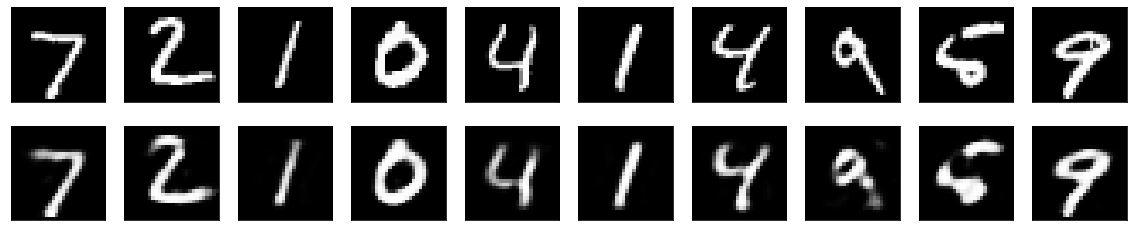

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras import regularizers
encoding_dim = 32
input_img = keras.Input(shape=(784,))

# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2874 - val_loss: 0.2032
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1815 - val_loss: 0.1639
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1548 - val_loss: 0.1442
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1393 - val_loss: 0.1325
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1297 - val_loss: 0.1246
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1230 - val_loss: 0.1189
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1179 - val_loss: 0.1145
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1141 - val_loss: 0.1112
Epoch 9/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1113 - val_loss: 0.1090
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.109

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


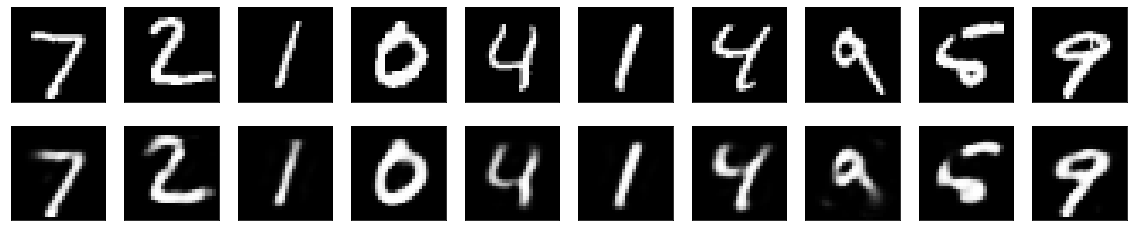

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2428 - val_loss: 0.1645
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1473 - val_loss: 0.1340
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1301 - val_loss: 0.1238
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1220 - val_loss: 0.1175
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1160 - val_loss: 0.1119
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1115 - val_loss: 0.1083
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1086 - val_loss: 0.1060
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1062 - val_loss: 0.1041
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1041 - val_loss: 0.1018
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.101

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


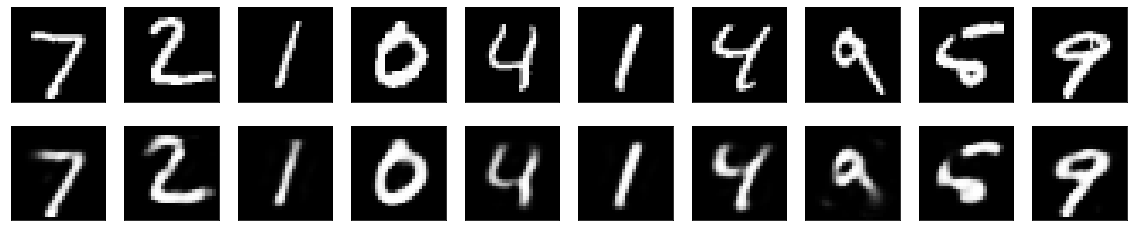

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()